In [ ]:
import pandas as pd
import numpy as np


In [ ]:
stats = pd.read_csv(r"/content/drive/My Drive/Classification/Seasons_Stats.csv")

In [ ]:
stats_clean = stats.drop(['blanl', 'blank2', 'Tm'], axis=1)

In [ ]:
stats_clean.head()

,Unnamed: 0,Year,Player,Pos,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,63.0,NaN,NaN,NaN,0.368,NaN,0.467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,3.6,3.5,NaN,NaN,NaN,NaN,NaN,144.0,516.0,0.279,NaN,NaN,NaN,144.0,516.0,0.279,0.279,170.0,241.0,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,49.0,NaN,NaN,NaN,0.435,NaN,0.387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN,102.0,274.0,0.372,NaN,NaN,NaN,102.0,274.0,0.372,0.372,75.0,106.0,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,67.0,NaN,NaN,NaN,0.394,NaN,0.259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,2.8,3.6,NaN,NaN,NaN,NaN,NaN,174.0,499.0,0.349,NaN,NaN,NaN,174.0,499.0,0.349,0.349,90.0,129.0,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,15.0,NaN,NaN,NaN,0.312,NaN,0.395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,22.0,86.0,0.256,NaN,NaN,NaN,22.0,86.0,0.256,0.256,19.0,34.0,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,13.0,NaN,NaN,NaN,0.308,NaN,0.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,21.0,82.0,0.256,NaN,NaN,NaN,21.0,82.0,0.256,0.256,17.0,31.0,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [ ]:
players = pd.read_csv(r"/content/drive/My Drive/Classification/Players.csv")
players.head(10)

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky
5,5,Gene Berce,180.0,79.0,Marquette University,1926.0,NaN,NaN
6,6,Charlie Black,196.0,90.0,University of Kansas,1921.0,Arco,Idaho
7,7,Nelson Bobb,183.0,77.0,Temple University,1924.0,Philadelphia,Pennsylvania
8,8,Jake Bornheimer,196.0,90.0,Muhlenberg College,1927.0,New Brunswick,New Jersey
9,9,Vince Boryla,196.0,95.0,University of Denver,1927.0,East Chicago,Indiana


In [ ]:
#To merge the 2 different data sets (Stats_clean and Players) using the Player names as the column to make the join possible
data = pd.merge(stats_clean, players[['Player', 'height', 'weight']], left_on='Player', right_on='Player', right_index=False,
      how='left', sort=False).fillna(value=0)
data = data[~(data['Pos']==0) & (data['MP'] > 400)]
data.reset_index(inplace=True, drop=True)
data['Player'] = data['Player'].str.replace('*','')

totals = ['PER', 'OWS', 'DWS', 'WS', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA',
         'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

for col in totals:
    data[col] = 36 * data[col] / data['MP']

In [ ]:
data.isnull().sum()

Unnamed: 0    0
Year          0
Player        0
Pos           0
Age           0
G             0
GS            0
MP            0
PER           0
TS%           0
3PAr          0
FTr           0
ORB%          0
DRB%          0
TRB%          0
AST%          0
STL%          0
BLK%          0
TOV%          0
USG%          0
OWS           0
DWS           0
WS            0
WS/48         0
OBPM          0
DBPM          0
BPM           0
VORP          0
FG            0
FGA           0
FG%           0
3P            0
3PA           0
3P%           0
2P            0
2PA           0
2P%           0
eFG%          0
FT            0
FTA           0
FT%           0
ORB           0
DRB           0
TRB           0
AST           0
STL           0
BLK           0
TOV           0
PF            0
PTS           0
height        0
weight        0
dtype: int64

In [ ]:
x = data.height
y = data.Pos

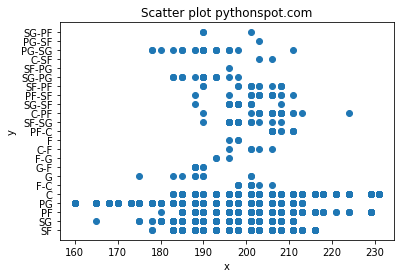

In [ ]:
plt.scatter(x, y)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
ModifiedNoNullData = data.replace(['PG', 'SG', 'SF','PF','C','G-F','F-G','F-C','C-F'],[1,2,3,4,5,6,7,8,9])

In [ ]:
ModifiedNoNullData.head()

,Unnamed: 0,Year,Player,Pos,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,height,weight
0,488,1952.0,Paul Arizin,3,23.0,66.0,0.0,2939.0,0.312351,0.546,0.0,0.579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.181286,0.014699,0.195985,0.261,0.0,0.0,0.0,0.0,6.712487,14.968357,0.448,0.0,0.0,0.0,6.712487,14.968357,0.448,0.448,7.079959,8.660088,0.818,0.0,0.0,9.125553,2.082341,0.0,0.0,0.0,3.062266,20.504934,193.0,86.0
1,489,1952.0,Cliff Barker,2,31.0,44.0,0.0,494.0,0.787045,0.343,0.0,0.317,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.051012,0.058300,0.007287,0.008,0.0,0.0,0.0,0.0,3.497976,11.732794,0.298,0.0,0.0,0.0,3.497976,11.732794,0.298,0.298,2.186235,3.716599,0.588,0.0,0.0,5.902834,5.101215,0.0,0.0,0.0,4.080972,9.182186,188.0,83.0
2,490,1952.0,Don Barksdale,4,28.0,62.0,0.0,2014.0,0.282423,0.409,0.0,0.427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003575,0.025025,0.026812,0.036,0.0,0.0,0.0,0.0,4.861966,14.371400,0.338,0.0,0.0,0.0,4.861966,14.371400,0.338,0.338,4.236346,6.131082,0.691,0.0,0.0,10.742800,2.448858,0.0,0.0,0.0,4.111221,13.960278,198.0,90.0
3,491,1952.0,Leo Barnhorst,3,27.0,66.0,0.0,2344.0,0.244198,0.419,0.0,0.208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019966,0.053754,0.072184,0.097,0.0,0.0,0.0,0.0,5.360068,13.776451,0.389,0.0,0.0,0.0,5.360068,13.776451,0.389,0.389,1.873720,2.872014,0.652,0.0,0.0,6.604096,3.916382,0.0,0.0,0.0,3.010239,12.593857,193.0,86.0
4,494,1952.0,Nelson Bobb,1,27.0,62.0,0.0,1192.0,0.329195,0.420,0.0,0.546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021141,0.012081,0.036242,0.048,0.0,0.0,0.0,0.0,3.322148,9.241611,0.359,0.0,0.0,0.0,3.322148,9.241611,0.359,0.359,2.989933,5.043624,0.593,0.0,0.0,4.439597,5.073826,0.0,0.0,0.0,5.496644,9.634228,183.0,77.0


In [ ]:
ModifiedNoNullData.to_csv('ModifiedNoNullData.csv')

In [ ]:
X = data.drop(['Player', 'Pos', 'G', 'GS', 'MP'], axis=1)
y = data['Pos']

encoder = LabelBinarizer()
y_cat = encoder.fit_transform(y)
nlabels = len(encoder.classes_)

scaler =StandardScaler()
Xnorm = scaler.fit_transform(X)

stats2017 = (data['Year'] == 2017)
X_train = Xnorm[~stats2017]
y_train = y_cat[~stats2017]
X_test = Xnorm[stats2017]
y_test = y_cat[stats2017]

In [ ]:
model = Sequential()
model.add(Dense(40, activation='relu', input_dim=46))
model.add(Dropout(0.5))
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nlabels, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
